In [1]:
import pandas as pd
import numpy as np

tweets = pd.read_csv("C:\\Users\\hp\\Documents\\Datasets\\Tweets_US_Airline.csv")
print(type(tweets))

<class 'pandas.core.frame.DataFrame'>


In [2]:
print(tweets.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [3]:
df = tweets.copy()
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [5]:
# Unnecessary columns
columns_to_drop = ['tweet_id', 'airline_sentiment_confidence', 'negativereason',
    'negativereason_confidence', 'airline', 'airline_sentiment_gold',
    'name', 'negativereason_gold', 'retweet_count', 'tweet_coord',
    'tweet_created', 'tweet_location', 'user_timezone']

# Dropping
df.drop(columns=columns_to_drop, inplace=True, axis=1)

print(df.columns)

Index(['airline_sentiment', 'text'], dtype='object')


In [6]:
print(df.isnull().sum())

airline_sentiment    0
text                 0
dtype: int64


In [7]:
#changing sentiments into numeric values
def sentiment_to_numeric(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    elif sentiment == 'positive':
        return 2
    else:
        return -1

df['airline_sentiment'] = df['airline_sentiment'].apply(sentiment_to_numeric)

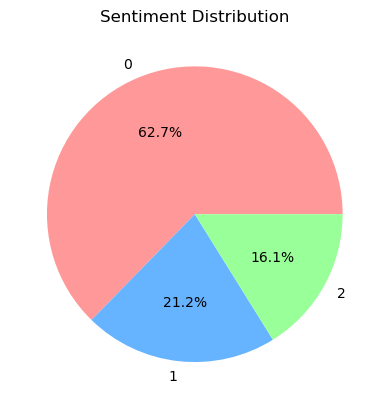

In [8]:
import matplotlib.pyplot as plt

# Example of predicted sentiment counts
sentiment_counts = df['airline_sentiment'].value_counts()

# Plotting pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.show()


In [11]:
import re

# Function to clean the text using regex
def clean_text(text):
    # Remove URLs (http:// or https://)
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)
    # Remove special characters, numbers and keep only alphabets and spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
print(df[['text', 'cleaned_text']].head())

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                          what said  
1  plus youve added commercials to the experience...  
2  i didnt today must mean i need to take another...  
3  its really aggressive to blast obnoxious enter...  
4            and its a really big bad thing about it  


In [12]:
!pip install nltk

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
##performing tokenization
import nltk
from nltk.tokenize import word_tokenize
df['tokenized_text'] = df['cleaned_text'].apply(nltk.word_tokenize)
print(df[['cleaned_text', 'tokenized_text']].head())

                                        cleaned_text  \
0                                          what said   
1  plus youve added commercials to the experience...   
2  i didnt today must mean i need to take another...   
3  its really aggressive to blast obnoxious enter...   
4            and its a really big bad thing about it   

                                      tokenized_text  
0                                       [what, said]  
1  [plus, youve, added, commercials, to, the, exp...  
2  [i, didnt, today, must, mean, i, need, to, tak...  
3  [its, really, aggressive, to, blast, obnoxious...  
4  [and, its, a, really, big, bad, thing, about, it]  


In [16]:
##removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokenized_text):
    # Convert to lowercase and remove stopwords
    return [word for word in tokenized_text if word not in stop_words]

df['tokens_without_stopwords'] = df['tokenized_text'].apply(remove_stopwords)
print(df[['cleaned_text', 'tokenized_text', 'tokens_without_stopwords']].head())

                                        cleaned_text  \
0                                          what said   
1  plus youve added commercials to the experience...   
2  i didnt today must mean i need to take another...   
3  its really aggressive to blast obnoxious enter...   
4            and its a really big bad thing about it   

                                      tokenized_text  \
0                                       [what, said]   
1  [plus, youve, added, commercials, to, the, exp...   
2  [i, didnt, today, must, mean, i, need, to, tak...   
3  [its, really, aggressive, to, blast, obnoxious...   
4  [and, its, a, really, big, bad, thing, about, it]   

                            tokens_without_stopwords  
0                                             [said]  
1  [plus, youve, added, commercials, experience, ...  
2  [didnt, today, must, mean, need, take, another...  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing

In [17]:
#performing lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on tokenized text
def lemmatize_tokens(tokenized_text):
    return [lemmatizer.lemmatize(word) for word in tokenized_text]

df['lemmatized_text'] = df['tokens_without_stopwords'].apply(lemmatize_tokens)
print(df[['cleaned_text', 'tokenized_text', 'tokens_without_stopwords', 'lemmatized_text']].head())

                                        cleaned_text  \
0                                          what said   
1  plus youve added commercials to the experience...   
2  i didnt today must mean i need to take another...   
3  its really aggressive to blast obnoxious enter...   
4            and its a really big bad thing about it   

                                      tokenized_text  \
0                                       [what, said]   
1  [plus, youve, added, commercials, to, the, exp...   
2  [i, didnt, today, must, mean, i, need, to, tak...   
3  [its, really, aggressive, to, blast, obnoxious...   
4  [and, its, a, really, big, bad, thing, about, it]   

                            tokens_without_stopwords  \
0                                             [said]   
1  [plus, youve, added, commercials, experience, ...   
2  [didnt, today, must, mean, need, take, another...   
3  [really, aggressive, blast, obnoxious, enterta...   
4                          [really, big, bad, 

In [19]:
##Vectorization TF-IDF

## Function to join lemmatized tokens into a single string
def join_tokens(lemmatized_tokens):
    return ' '.join(lemmatized_tokens)

df['lemmatized_text_str'] = df['lemmatized_text'].apply(join_tokens)

##applying TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# Apply TF-IDF vectorization
X = vectorizer.fit_transform(df['lemmatized_text_str'])

In [20]:
vectorizer.vocabulary_    #feature name with their indexes

{'said': 3825,
 'plus': 3293,
 'youve': 4987,
 'added': 55,
 'commercial': 894,
 'experience': 1576,
 'didnt': 1251,
 'today': 4510,
 'must': 2875,
 'mean': 2727,
 'need': 2903,
 'take': 4382,
 'another': 190,
 'trip': 4580,
 'really': 3538,
 'aggressive': 93,
 'blast': 478,
 'obnoxious': 2993,
 'entertainment': 1485,
 'guest': 1980,
 'face': 1608,
 'amp': 165,
 'little': 2570,
 'recourse': 3568,
 'big': 449,
 'bad': 363,
 'thing': 4452,
 'seriously': 3943,
 'would': 4927,
 'pay': 3188,
 'flight': 1722,
 'seat': 3894,
 'playing': 3279,
 'flying': 1756,
 'va': 4736,
 'yes': 4972,
 'nearly': 2900,
 'every': 1528,
 'time': 4490,
 'fly': 1753,
 'vx': 4786,
 'ear': 1398,
 'wont': 4910,
 'go': 1916,
 'away': 346,
 'missed': 2815,
 'prime': 3384,
 'opportunity': 3056,
 'men': 2754,
 'without': 4892,
 'hat': 2030,
 'well': 4849,
 'amazing': 154,
 'arrived': 263,
 'hour': 2143,
 'early': 1401,
 'youre': 4985,
 'good': 1927,
 'know': 2457,
 'suicide': 4316,
 'second': 3902,
 'leading': 2509,
 'c

In [21]:
df.head()

,airline_sentiment,text,cleaned_text,tokenized_text,tokens_without_stopwords,lemmatized_text,lemmatized_text_str
0,1,@VirginAmerica What @dhepburn said.,what said,"[what, said]",[said],[said],said
1,2,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp...","[plus, youve, added, commercials, experience, ...","[plus, youve, added, commercial, experience, t...",plus youve added commercial experience tacky
2,1,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak...","[didnt, today, must, mean, need, take, another...","[didnt, today, must, mean, need, take, another...",didnt today must mean need take another trip
3,0,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious...","[really, aggressive, blast, obnoxious, enterta...","[really, aggressive, blast, obnoxious, enterta...",really aggressive blast obnoxious entertainmen...
4,0,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]","[really, big, bad, thing]","[really, big, bad, thing]",really big bad thing


In [22]:
df['lemmatized_text_str'].iloc[1]

'plus youve added commercial experience tacky'

In [23]:
X[3].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [25]:
print(X.shape)  #dimensions of the matrix

(14640, 5000)


In [26]:
## applying ML models
from sklearn.model_selection import train_test_split

y = df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
print("Accuracy:")
print(acc)
print("Confusion Matrix:")
print(conf)
print("Classification Report:")
print(c_report)

Accuracy:
0.7957650273224044
Confusion Matrix:
[[1772   88   29]
 [ 266  283   31]
 [ 124   60  275]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1889
           1       0.66      0.49      0.56       580
           2       0.82      0.60      0.69       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



In [30]:
## Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [31]:
acc_nb = accuracy_score(y_test, y_pred_nb)
conf_nb = confusion_matrix(y_test, y_pred_nb)
c_report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes - Accuracy:")
print(acc_nb)
print("Naive Bayes - Confusion Matrix:")
print(conf_nb)
print("Naive Bayes - Classification Report:")
print(c_report_nb)


Naive Bayes - Accuracy:
0.7336065573770492
Naive Bayes - Confusion Matrix:
[[1851   30    8]
 [ 429  133   18]
 [ 273   22  164]]
Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.83      1889
           1       0.72      0.23      0.35       580
           2       0.86      0.36      0.51       459

    accuracy                           0.73      2928
   macro avg       0.77      0.52      0.56      2928
weighted avg       0.75      0.73      0.69      2928



In [32]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
conf_svm = confusion_matrix(y_test, y_pred_svm)
c_report_svm = classification_report(y_test, y_pred_svm)

print("SVM - Accuracy:")
print(acc_svm)
print("SVM - Confusion Matrix:")
print(conf_svm)
print("SVM - Classification Report:")
print(c_report_svm)


SVM - Accuracy:
0.7967896174863388
SVM - Confusion Matrix:
[[1713  128   48]
 [ 216  305   59]
 [  89   55  315]]
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.62      0.53      0.57       580
           2       0.75      0.69      0.72       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



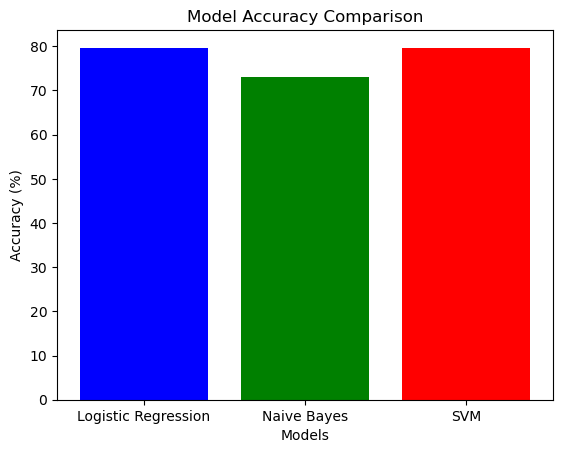

In [88]:
import matplotlib.pyplot as plt

# Accuracy values for different models
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracy = [79.6, 73, 79.67]

# Plotting the bar chart
plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()
